In [1]:
import pandas as pd

df = pd.read_csv('./archive/trainingset_annotations.csv')
df

,image_name,image_url,xmin,xmax,ymin,ymax
0,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,59,109,300,357
1,Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg,https://requestor-proxy.figure-eight.com/figur...,53,101,257,309
2,FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg,https://requestor-proxy.figure-eight.com/figur...,710,826,295,433
3,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,347,389,218,317
4,1Qn5_JRh_Bb8axrWdUej8A_zoom_5___1_9.jpg,https://requestor-proxy.figure-eight.com/figur...,342,381,316,425
...,...,...,...,...,...,...
2252,y1SR9VEd5KAen1iusx2Hdg_zoom_5___1_5.jpg,https://requestor-proxy.figure-eight.com/figur...,538,590,298,354
2253,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_0.jpg,https://requestor-proxy.figure-eight.com/figur...,685,723,306,349
2254,ZBoz4vPEr1c9Qz25C6CV-g_zoom_5___1_12.jpg,https://requestor-proxy.figure-eight.com/figur...,833,874,286,328
2255,zCtKblvtFS0olTVtnOHWbQ_zoom_5___1_7.jpg,https://requestor-proxy.figure-eight.com/figur...,265,299,262,301


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  2257 non-null   object
 1    image_url  2257 non-null   object
 2    xmin       2257 non-null   int64 
 3    xmax       2257 non-null   int64 
 4    ymin       2257 non-null   int64 
 5    ymax       2257 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 105.9+ KB


In [3]:
df.describe()

,xmin,xmax,ymin,ymax
count,2257.000000,2257.000000,2257.000000,2257.000000
mean,516.705361,572.592379,309.746566,384.462561
std,302.748791,303.288366,170.445509,173.910269
min,0.000000,29.000000,0.000000,13.000000
25%,245.000000,303.000000,233.000000,301.000000
50%,524.000000,583.000000,287.000000,350.000000
75%,786.000000,844.000000,339.000000,415.000000
max,1037.000000,1050.000000,1022.000000,1050.000000


### There are no missing values

In [4]:
from pathlib import Path

PATH = Path("./archive/trainingset/trainingset")
list(PATH.iterdir())[:5]

[PosixPath('archive/trainingset/trainingset/j405wJThv5K_xS8DfusUow_zoom_5___1_6.jpg'),
 PosixPath('archive/trainingset/trainingset/Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg'),
 PosixPath('archive/trainingset/trainingset/57RyEsvd32kH-qe4mk8d8Q_zoom_5___2_1.jpg'),
 PosixPath('archive/trainingset/trainingset/FGmto9ZBGMNr_s4_c89G_g_zoom_5___1_11.jpg'),
 PosixPath('archive/trainingset/trainingset/hjFahFKnmHpdqzToLzjmsQ_zoom_5___1_12.jpg')]

In [5]:
import cv2
import matplotlib.pyplot as plt 

def read_image(path):
    img = cv2.imread(str(path))
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

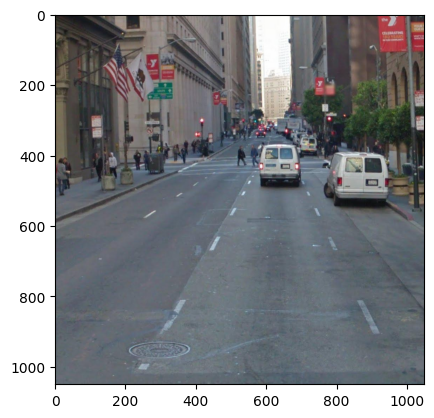

In [6]:
path = PATH/'j405wJThv5K_xS8DfusUow_zoom_5___1_6.jpg'
img = read_image(path)
plt.imshow(img)

In [7]:
img = cv2.imread(str(path))
img.shape

(1050, 1050, 3)

In [8]:
import numpy as np

files = list(PATH.iterdir())
imgs = [read_image(str(p)).shape for p in files]
np.unique(imgs)

array([   3, 1050])

All images are of the same size

# Check Accuracy of Existing Labels

In [9]:
first_row = df.iloc[0]
first_row

image_name              Frl1FCa6v4X6z21I0es70w_zoom_5___1_6.jpg
 image_url    https://requestor-proxy.figure-eight.com/figur...
 xmin                                                        59
 xmax                                                       109
 ymin                                                       300
 ymax                                                       357
Name: 0, dtype: object

In [10]:
bounding_box = { 'xmin': first_row[' xmin'], 'ymin': first_row[' ymin'], 'xmax': first_row[' xmax'], 'ymax': first_row[' ymax'], 'label': 'Parking Sign' }

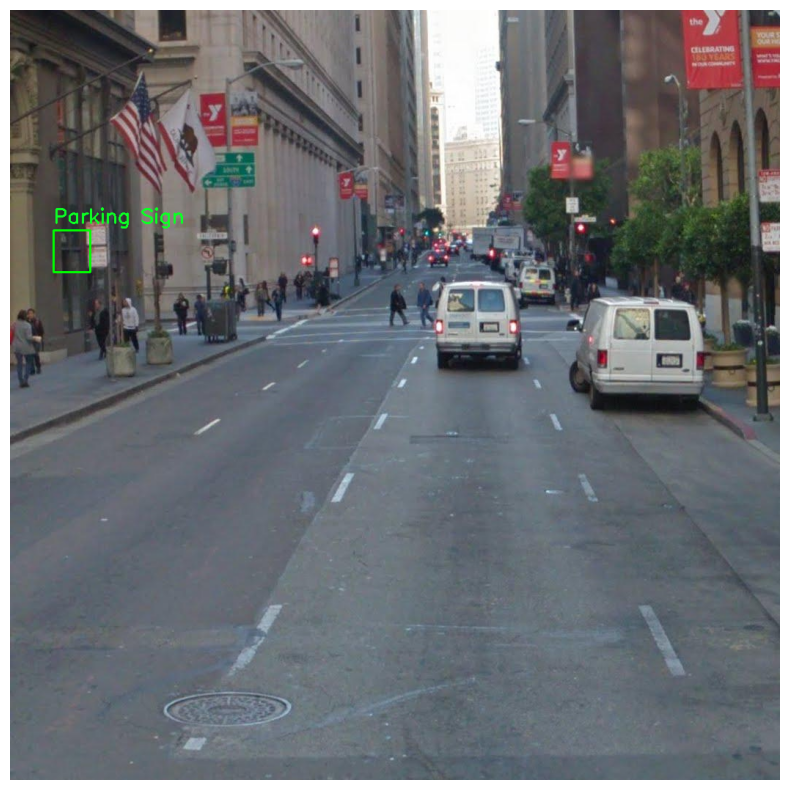

In [12]:
img = cv2.imread(str(path))

cv2.rectangle(img, (bounding_box['xmin'], bounding_box['ymin']), (bounding_box['xmax'], bounding_box['ymax']), (0, 255, 0), 2)

cv2.putText(img, bounding_box['label'], (bounding_box['xmin'], bounding_box['ymin']-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
grayscale_image = color_image.convert("L")
plt.imshow(grayscale_image)

In [ ]:
overlay = Image.new('RGBA', grayscale_image.size, (0, 0, 0, 0))
overlay_draw = ImageDraw.Draw(overlay)
fill_color = (255, 0, 0, 64)
overlay_draw.rectangle(coordinates, fill=fill_color)

# Blend the overlay with the base image
combined = Image.alpha_composite(grayscale_image, overlay)

# Now you can show the combined image
plt.imshow(combined)
plt.axis('off')
plt.show()